## CS 2064: Josh Collins
"I have neither given nor received help on this assignment." 
### Data Science Research questions
The goal of this project is to test multiple features of forest fires,
1. How long it will take a fire to hypothetically reach you based on a specified location.
2. An analysis of fish names and species using API
3. An analysis of differing fire size using web scraping

### Sources
- https://earthquake.usgs.gov/fdsnws/event/1/query
- https://oceana.org/ocean-fishes/
- https://www.nifc.gov/nicc/predictive-services/intelligence
- https://github.com/joshcollins02/CSCI121Final/tree/code
- https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128

### Description
Part of this project is an expansion of a previous project done by Josh Collins, on top of distance, the direct analytics of fire safety will be tested in the entirety of North America with Visualizations.

In [3]:
# Initial import of pandas and numpy
import pandas as pd
import numpy as np
# Import requests and time for API
import io
import requests
from datetime import datetime, timedelta
# Import plotting libraries for visualizations
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
#Import Beautiful Soup for web scraping
from bs4 import BeautifulSoup

### API data access will be done here
- We will be gathering basic data based on the general categories of each Earthquake (size and location)
- Gathering based on websites
-     https://earthquake.usgs.gov/

In [12]:
# url for earthquake query
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
# parameters for most recent dates
parameters = {
    "format": "geojson",
    "starttime": (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d"),
    "endtime": datetime.now().strftime("%Y-%m-%d"),
    "minmagnitude": 4.5  
}
# requests
response = requests.get(base_url, params=parameters)
# check for an A-Ok response code and return json data
if response.status_code == 200:
    data = response.json()
# returns a string response for magnitude and location of 5 most recent earthquakes
    print(f"Found {len(data['features'])} earthquakes.")
    for quake in data["features"][:5]:
        place = quake["properties"]["place"]
        mag = quake["properties"]["mag"]
        time = datetime.fromtimestamp(quake["properties"]["time"] / 1000).strftime('%Y-%m-%d %H:%M:%S')
        print(f"Magnitude {mag} earthquake near {place} at {time}")
else:
    print(f"Error: {response.status_code} - {response.text}")

Found 106 earthquakes.
Magnitude 4.7 earthquake near 155 km ESE of Pondaguitan, Philippines at 2024-12-10 16:26:39
Magnitude 5.8 earthquake near 93 km SSW of Adak, Alaska at 2024-12-10 13:04:35
Magnitude 4.8 earthquake near 15 km WSW of La Capilla, Peru at 2024-12-10 09:19:22
Magnitude 4.5 earthquake near 119 km WNW of Mejillones, Chile at 2024-12-10 07:51:27
Magnitude 4.7 earthquake near 14 km SSE of Jurm, Afghanistan at 2024-12-10 05:03:03


### Web Scraping will be completed here
Taking containers on a page describing fish details and entering each container and taking the fish name and species class using html

In [75]:
# Web scrape fish species
def scrape_ocean_fishes(base_url):
    # check for an A-Ok response code
    response = requests.get(base_url)
    if response.status_code != 200:
        print(f"Failed to fetch the main page, status code: {response.status_code}")
        return
# Initiate soup as an html parser
    soup = BeautifulSoup(response.text, 'html.parser')
# Look for containers using inspect on webpage in html format and append to list
    fish_links = []
    fish_cards = soup.find_all("a", class_="wp-block-toolset-blocks-container tb-container")
    for card in fish_cards:
        fish_links.append(card['href'])
# Iterate for each link to access fish data based on their name cards
    for link in fish_links:
        fish_url = link
        fish_response = requests.get(fish_url)

        if fish_response.status_code != 200:
            print(f"Failed to fetch fish page: {fish_url}, status code: {fish_response.status_code}")
            continue

        fish_soup = BeautifulSoup(fish_response.text, 'html.parser')
# finding fish names based on their html class
        fish_name_tag = fish_soup.find("p", class_="tb-heading has-text-color")
        if fish_name_tag:
            fish_name = fish_name_tag.get_text(strip=True)
        else:
            fish_name = "No fish name found."
# finding fish species based on their html class
        species_tag = fish_soup.find("p", class_="tb-heading has-text-color has-background")
        if species_tag:
            species = species_tag.get_text(strip=True)
        else:
            species = "No species information found."

        print(f"Fish Name: {fish_name}")
        print(f"Species: {species}\n")
# url to scrape from
base_url = "https://oceana.org/ocean-fishes/"
scrape_ocean_fishes(base_url)

Fish Name: Atlantic Bluefin Tuna
Species: Thunnus thynnus

Fish Name: Atlantic Cod
Species: Gadus Morhua

Fish Name: Atlantic Goliath Grouper
Species: Epinephelus itajara

Fish Name: Atlantic Salmon
Species: Salmo Salar

Fish Name: Atlantic Trumpetfish
Species: Aulostomus Maculatus

Fish Name: Atlantic Wolffish
Species: Anarhichas lupus

Fish Name: Banded Butterflyfish
Species: Chaetodon striatus

Fish Name: Beluga Sturgeon
Species: Huso huso

Fish Name: Blue Marlin
Species: Makaira nigricans

Fish Name: Blue Tang
Species: Acanthurus coeruleus

Fish Name: Bluebanded Goby
Species: Lythrypnus Dalli

Fish Name: Bluehead Wrasse
Species: Thalassoma bifasciatum

Fish Name: California Grunion
Species: Leuresthes Tenuis

Fish Name: Chilean Common Hake
Species: Merluccius Gayi

Fish Name: Chilean Jack Mackerel
Species: Trachurus Murphyi

Fish Name: Chinook Salmon
Species: Oncorhynchus Tshawytscha

Fish Name: Clown Triggerfish
Species: Balistoides Conspicillum

Fish Name: Coelacanth
Species: Lat

This data didn't need claculation, while a calculation may be helpful, I felt justa rough description of each fish that is researched by this company would suffice as I added their scientific species names.

### Importing the direct downloadable dataset

In [4]:
fired = pd.read_csv("Fire_data.csv")

C:\Users\110jo\AppData\Local\Temp\ipykernel_20412\1953055884.py:1: DtypeWarning: Columns (13,14,16,32,61,64,68,69,77,85,86,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  fired = pd.read_csv("Fire_data.csv")


### Shortening the dataset from 300k entries to 20k

In [32]:
fired2 = fired.head(20000)

### Distance and time formulas will be tested here
These functions were built off of previous ones that I wrote in Java. I converted them to python, and added a visualization using GeoDataFrame mapping the locations of all 20k fires as well as the location they are being compared to.

In [7]:
def haversine(lat1, lat2, lon1, lon2):
# distance of Earth in kilometers
    R = 6371
# converting the coordinates into radians and generating difference distance
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    latDistance = lat2 - lat1
    lonDistance = lon2 - lon1
# using haversine formula to find the distance by incoorporating the difference distance
    a = (np.sin(latDistance / 2) ** 2
    + np.cos(lat1) * np.cos(lat2) * np.sin(lonDistance / 2) ** 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
# converting to meters
    distance = R * c
# converting to kilometers
    real_dist = distance / 100
    real_dist = round(real_dist, 3)
    
    return real_dist

This code calculates distance based on the formula:
- a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
- c = 2 * atan2( √a, √(1−a) )
- d = R ⋅ c

gotten from https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128

example based on the first entry with coordinates (-118.1807, 33.8089800000001) if inputted with (-117.0522, 33.2437) should return a distance of roughly 109 kilometers

In [8]:
# inputting coordinates to compare with coordinates in data set
lat2, lon2 = -117.0522, 33.2437
fired['distance_to_fire'] = fired.apply(
    lambda row: haversine(lat2, lon2, row['x'], row['y']), axis=1
)
print(fired.head())

   OBJECTID  SourceOID ABCDMisc ADSPermissionState ContainmentDateTime  \
0         1    7747595      NaN            DEFAULT                 NaN   
1         2    6384391      NaN            DEFAULT                 NaN   
2         3    1383752      NaN            DEFAULT                 NaN   
3         4   22499589      NaN            DEFAULT                 NaN   
4         5   23869477      NaN            DEFAULT                 NaN   

  ControlDateTime CreatedBySystem  IncidentSize  DiscoveryAcres  \
0             NaN         lacocad           NaN            0.10   
1             NaN        firecode           NaN             NaN   
2             NaN        firecode           NaN             NaN   
3             NaN           cfcad           NaN            0.10   
4             NaN         lacocad           NaN            0.01   

  DispatchCenterID  ...    CreatedOnDateTime_dt   ModifiedOnDateTime_dt  \
0           CALACC  ...    2/28/2020 8:52:36 PM    2/28/2020 8:52:36 PM   
1 

In [9]:
# using the distance formula incorporating in time estimation
def getTime(real_dist):
# average speed a fire spreads
    speed = 22.97
    hours = real_dist / speed
    mins = np.floor(hours * 60)
# if its less than an hour will return minutes otherwise returns hours and minutes
    if mins >= 60:
        hours2 = np.floor(mins / 60)
        mins2 = mins % 60
        return 'Fire will take approx', hours2, 'hour(s) and', mins2, 'minutes to reach you.'
    else:
        return 'Fire will take approx', mins2, 'minutes to reach you.'

In [10]:
# return the fire spread rate for each value in the data set
fired['time_to_fire'] = fired['distance_to_fire'].apply(getTime)
print(fired[['distance_to_fire', 'time_to_fire']])

        distance_to_fire                                       time_to_fire
0                109.823  (Fire will take approx, 4.0, hour(s) and, 46.0...
1                110.166  (Fire will take approx, 4.0, hour(s) and, 47.0...
2                108.441  (Fire will take approx, 4.0, hour(s) and, 43.0...
3                110.023  (Fire will take approx, 4.0, hour(s) and, 47.0...
4                109.771  (Fire will take approx, 4.0, hour(s) and, 46.0...
...                  ...                                                ...
295926           114.002  (Fire will take approx, 4.0, hour(s) and, 57.0...
295927           114.001  (Fire will take approx, 4.0, hour(s) and, 57.0...
295928           109.871  (Fire will take approx, 4.0, hour(s) and, 46.0...
295929           119.153  (Fire will take approx, 5.0, hour(s) and, 11.0...
295930           114.390  (Fire will take approx, 4.0, hour(s) and, 58.0...

[295931 rows x 2 columns]


### Visualiztion of fires in the US over the last 2 years

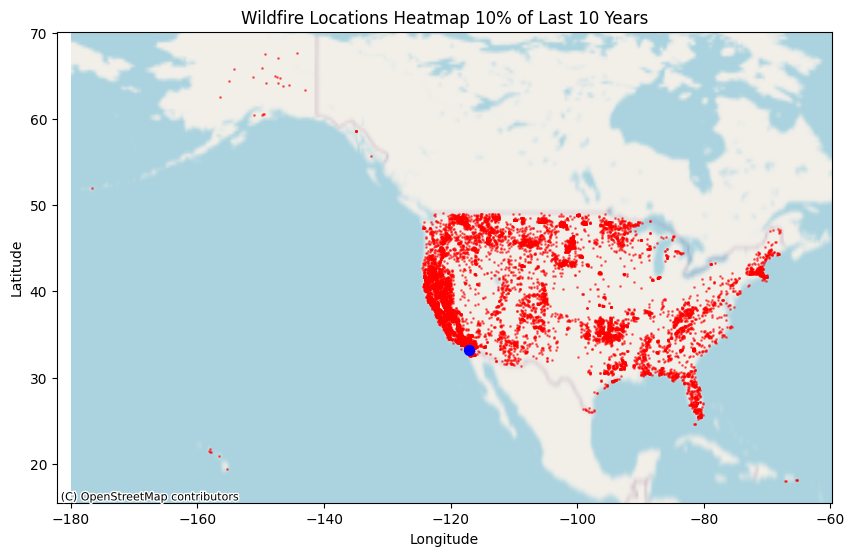

In [77]:
# taking a copy of data and setting the map to only the left hemisphere to focus in on the data points
fired2 = fired2.copy()
fired2['x'] = fired2['x'].apply(lambda lon: lon - 360 if lon > 0 else lon)
# creates the dataframe based on the seed that visualizes the earth
geometry = [Point(xy) for xy in zip(fired2['x'], fired2['y'])]
geo_df = gpd.GeoDataFrame(fired2, geometry=geometry, crs="EPSG:4326")
# creates red pins for each location
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, alpha=0.5, color='red', markersize=1)
# creates a blue pin for the location specified earlier
fire_point = Point(-117.0522, 33.2437)
ax.scatter(fire_point.x, fire_point.y, color='blue', s=50, label="Specific Fire Location")
# opens the map with labels
cx.add_basemap(ax, crs=geo_df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title("Wildfire Locations Heatmap 10% of Last 10 Years")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

This map shows a visualization of the 20k fires over the past 1-2 years. The blue dot is the location (-117.0522, 33.2437).

Based on the pins you can see that california has a very dry climate, as it's still experiencing a semi drought. While it may have been good to exclude outliers of fires greater than 100,000km2 or less than 10km2, an overall view of all fires I felt was acceptable since there's no difference in size between what caused each fire (natural or man made).

### Peer Review

### Direct Quote: 
"It will be easier to choose different types of data sets to use."
### Response: 
"I didn't think of that, I may have to change it up then."
### Change: 
From that I decided to branch out and choose different data sets. I wanted to focus on the same idea of environmental features so insetad of only wildfires I chose fish species and earthquakes.